In [50]:
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from random import randint
import numpy as np
import math

In [ ]:
'''
    Attribute Information:

    1. sepal length in cm 
    2. sepal width in cm 
    3. petal length in cm 
    4. petal width in cm 
    5. class: 
    -- Iris Setosa - 1
    -- Iris Versicolour - 2 
    -- Iris Virginica - 3
'''

In [4]:
# Separa o dataset em listas: x -> entrada e y -> saida
x = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(0,1,2,3), skip_header=1)
y = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(4), skip_header=1)

In [42]:
# Separa as listas em amostras de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.1, random_state=35)
intrus = 0

In [10]:
def dist_euclidiana(v1, v2):
    global intrus
    dim, soma = len(v1), 0
    intrus += 3
    for i in range(dim - 1):
        intrus += 1
        soma += math.pow(v1[i] - v2[i], 2)
    intrus += 2
    return math.sqrt(soma)

In [11]:
def knn(x_treinamento, y_treinamento, nova_amostra, K):
    global intrus
    intrus = 0
    dists, tam_treino = {}, len(x_treinamento)
    intrus += 3
    for i in range(tam_treino):
        d = dist_euclidiana(x_treinamento[i], nova_amostra)
        dists[i] = d
        intrus += 2
    intrus += 1
    k_vizinhos = sorted(dists, key=dists.get)[:K]
    intrus += 3
    qtd_setosas, qtd_versis, qtd_virgis = 0, 0, 0
    intrus += 3
    for indice in k_vizinhos:
        if y_treinamento[indice] == 1:
            qtd_setosas += 1
            intrus += 1
        elif y_treinamento[indice] == 2:
            qtd_versis += 1
            intrus += 1
        else:
            qtd_virgis += 1
            intrus += 1

    if (qtd_setosas > qtd_versis) and (qtd_setosas > qtd_virgis):
        return 1
    elif (qtd_versis > qtd_setosas) and (qtd_versis > qtd_virgis):
        return 2
    else:
        return 3

In [12]:
def teste(n):
    print(x_teste[n])
    classes = {1: 'Iris-Setosa', 2: 'Iris-Versicolor', 3: 'Iris-Virginica'}
    print('Esperado: ' + classes[y_teste[n]])
    print('Classificado como: ' + classes[knn(x_treino, y_treino, x_teste[n], 15)])
    print('Total de instruções: ' + str(intrus))

In [43]:
teste(13)
print(len(x_treino))

[6.9 3.2 5.7 2.3]
Esperado: Iris-Virginica
Classificado como: Iris-Virginica
Total de instruções: 1375
135


In [45]:
def teste_todos(K):
    classes, total_acertos, erros = {1: 'Iris-Setosa', 2: 'Iris-Versicolor', 3: 'Iris-Virginica'}, 0, []
    for i in range(len(x_teste)):
        result = classes[knn(x_treino, y_treino, x_teste[i], K)]
        esperado = classes[y_teste[i]]
        if result == esperado:
            total_acertos += 1
        else:
            erros.append(i)
    print('Erros: ' + str(erros))
    print('Percentual de acerto: ' + str(round(total_acertos / len(x_teste), 4) * 100) + '%')

In [48]:
teste_todos(13)

Erros: [3]
Percentual de acerto: 93.33%


In [51]:
testes_instrus = [325, 475, 625, 775, 925, 1075, 1225, 1375]
testes_tamanho = [30, 45, 60,75, 90, 105, 120, 135]

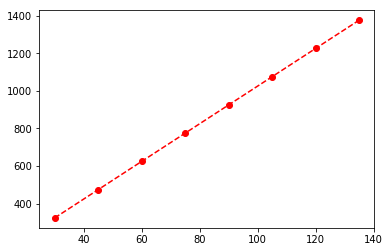

In [57]:
plt.plot(testes_tamanho, testes_instrus, 'r--', marker='o')